In [1]:
from string import Template

import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display, HTML
sns.set(context='paper', style='whitegrid', color_codes=True, font_scale=1.8)
colorcycle = [(0.498, 0.788, 0.498),
              (0.745, 0.682, 0.831),
              (0.992, 0.753, 0.525),
              (0.220, 0.424, 0.690),
              (0.749, 0.357, 0.090),
              (1.000, 1.000, 0.600),
              (0.941, 0.008, 0.498),
              (0.400, 0.400, 0.400)]
sns.set_palette(colorcycle)
mpl.rcParams['figure.max_open_warning'] = 65
mpl.rcParams['figure.figsize'] = [12, 7]
mpl.rcParams['text.usetex'] = True

from speclib import misc, plotting, loaders

%matplotlib inline

In [2]:
df = pd.read_json('../../allan_data/RGender_.json')
userAlias = loaders.Useralias()
df.index = df.index.map(lambda s: userAlias.lookup(s))
q = misc.QuestionCompleter(df)
f = misc.QuestionFilterer(df)

df.head()

,alcohol_binge10__answer,alcohol_binge10__answer_type,alcohol_binge10__condition,alcohol_binge10__question,alcohol_binge10__response,alcohol_binge5__answer,alcohol_binge5__answer_type,alcohol_binge5__condition,alcohol_binge5__question,alcohol_binge5__response,...,worries_partner__answer,worries_partner__answer_type,worries_partner__condition,worries_partner__question,worries_partner__response,worries_zieblings__answer,worries_zieblings__answer_type,worries_zieblings__condition,worries_zieblings__question,worries_zieblings__response
0010fedde8e61cad5b049da6df8b5a,1.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 10 genstande på en dag/aften,1 gange,2.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 5 genstande på en dag/aften,2 gange,...,NaN,radio,False,Kæreste/ægtefælle,Har ingen,3.0,radio,False,Søskende,Sjældent
002ee26a0c38a1f77b7cdeab8046cd,1.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 10 genstande på en dag/aften,1 gange,0.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 5 genstande på en dag/aften,0 gange,...,2.0,radio,False,Kæreste/ægtefælle,Af og til,NaN,radio,False,Søskende,Har ingen
0037c93a19a7e90580086b462ba11b,2.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 10 genstande på en dag/aften,2 gange,2.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 5 genstande på en dag/aften,2 gange,...,NaN,radio,False,Kæreste/ægtefælle,Har ingen,2.0,radio,False,Søskende,Af og til
005b1e0298bde6b726156aefb8d88c,1.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 10 genstande på en dag/aften,1 gange,1.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 5 genstande på en dag/aften,1 gange,...,NaN,radio,False,Kæreste/ægtefælle,Har ingen,NaN,radio,False,Søskende,Har ingen
00ad591e46eb6f3d8c474d9de9e219,0.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 10 genstande på en dag/aften,0 gange,1.0,radio,alcohol_debut != 'Jeg har aldrig drukket alkohol',Drukket mere end 5 genstande på en dag/aften,1 gange,...,2.0,radio,False,Kæreste/ægtefælle,Af og til,3.0,radio,False,Søskende,Sjældent


In [3]:
df.index = df.index.map(lambda x: userAlias.userdct[x]) 

In [4]:
bfi = df.filter(regex=r'bfi_.+__answer$').dropna(how='all').fillna('mean')
bfi.head()

,bfi_art__answer,bfi_calm__answer,bfi_careless__answer,bfi_caring__answer,bfi_cold__answer,bfi_confident__answer,bfi_coorporation__answer,bfi_creative__answer,bfi_currious__answer,bfi_depressed__answer,...,bfi_shy__answer,bfi_social__answer,bfi_stable__answer,bfi_strong_personality__answer,bfi_talk__answer,bfi_taste_art__answer,bfi_tense__answer,bfi_unbalanced__answer,bfi_work__answer,bfi_worry__answer
u0001,1.0,3.0,3.0,3.0,0.0,3.0,4.0,0.0,4.0,1.0,...,1.0,4.0,2.0,4.0,4.0,1.0,0.0,0.0,1.0,2.0
u0002,2.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,1.0,...,1.0,2.0,2.0,3.0,3.0,1.0,3.0,2.0,2.0,3.0
u0003,1.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,1.0,...,3.0,2.0,3.0,3.0,1.0,0.0,2.0,0.0,2.0,2.0
u0004,3.0,3.0,1.0,3.0,2.0,3.0,2.0,3.0,4.0,2.0,...,2.0,2.0,3.0,3.0,2.0,3.0,2.0,1.0,3.0,3.0
u0006,1.0,2.0,0.0,4.0,0.0,3.0,3.0,3.0,3.0,0.0,...,3.0,2.0,4.0,2.0,3.0,0.0,1.0,0.0,3.0,2.0


In [5]:
bfi.mean(axis=1).describe()

count    942.000000
mean       2.317731
std        0.214456
min        0.000000
25%        2.186047
50%        2.325581
75%        2.441860
max        3.069767
dtype: float64

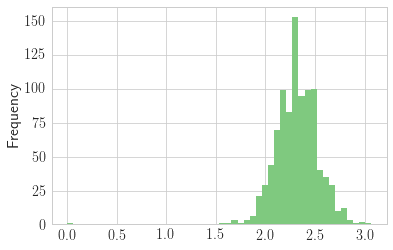

In [6]:
bfi.mean(axis=1).plot.hist(50)

In [7]:
resp = df.filter(like=r'response').dropna()

In [8]:
{k.replace('__response', ''): resp[k].unique() for k in resp.columns}

{'alcohol_binge10': array(['1 gange', '4-5 gange', '6+ gange', '0 gange', '3 gange',
        '2 gange'], dtype=object),
 'alcohol_binge5': array(['3 gange', '4-5 gange', '6+ gange', '2 gange', '1 gange',
        '0 gange'], dtype=object),
 'alcohol_debut': array(['14', '13', '11', '15', '12', '16', '6', '5', '10'], dtype=object),
 'alcohol_drunk': array(['6-9 gange', '4-5 gange', '1 gange', '0 gange', '2 gange',
        '3 gange'], dtype=object),
 'alcohol_everyday': array(['1 gange', '0 gange', '2 gange'], dtype=object),
 'alcohol_very_drunk': array(['1 gange', '4-5 gange', '6+ gange', '0 gange', '2 gange',
        '3 gange'], dtype=object),
 'alcohol_volume_friday': array([ 9., 12., 20.,  0., 10.,  2.,  8., 25.,  1., 30.,  6., 15.,  4.]),
 'alcohol_volume_monday': array([0., 5., 1., 4.]),
 'alcohol_volume_saturday': array([ 0.,  3., 10., 20., 17.,  1., 15.,  8.]),
 'alcohol_volume_sunday': array([ 0.,  2.,  3.,  7., 10.]),
 'alcohol_volume_thursday': array([10.,  0., 20., 25.,  8.,  

In [9]:
len({frozenset(resp[k].unique()) for k in resp.columns})

134